In [169]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)


In [171]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()
df_ball_positions = df_ball_positions.ffill()
df_ball_positions

,x1,y1,x2,y2
0,893.718750,615.549988,910.872803,633.891846
1,893.718750,615.549988,910.872803,633.891846
2,873.646179,637.591431,892.942566,657.352295
3,860.819458,649.968811,879.256393,669.305893
4,847.992737,662.346191,865.570221,681.259491
...,...,...,...,...
209,1182.914062,246.512146,1199.999390,267.054108
210,1182.995483,230.201752,1198.755371,248.135376
211,1182.969727,225.363739,1199.323608,244.479126
212,1178.511963,211.311493,1197.584961,230.948502


In [172]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,893.718750,615.549988,910.872803,633.891846,624.720917,624.720917
1,893.718750,615.549988,910.872803,633.891846,624.720917,624.720917
2,873.646179,637.591431,892.942566,657.352295,647.471863,632.304565
3,860.819458,649.968811,879.256393,669.305893,659.637352,639.137762
4,847.992737,662.346191,865.570221,681.259491,671.802841,645.670778
...,...,...,...,...,...,...
209,1182.914062,246.512146,1199.999390,267.054108,256.783127,285.475357
210,1182.995483,230.201752,1198.755371,248.135376,239.168564,269.694894
211,1182.969727,225.363739,1199.323608,244.479126,234.921432,256.722980
212,1178.511963,211.311493,1197.584961,230.948502,221.129997,244.650752


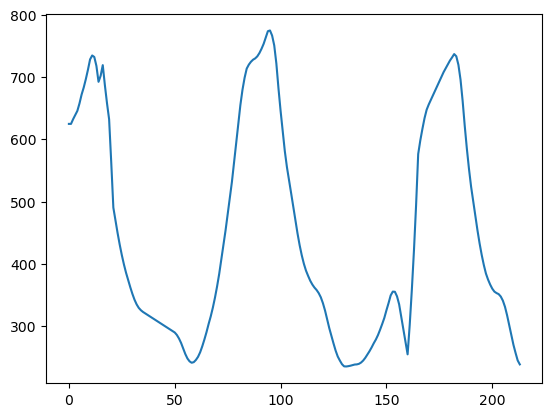

In [173]:
# df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y_rolling_mean'].rolling(window=10, min_periods=1, center=False).mean()
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [174]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y
0,893.718750,615.549988,910.872803,633.891846,624.720917,624.720917,NaN
1,893.718750,615.549988,910.872803,633.891846,624.720917,624.720917,0.000000
2,873.646179,637.591431,892.942566,657.352295,647.471863,632.304565,7.583649
3,860.819458,649.968811,879.256393,669.305893,659.637352,639.137762,6.833197
4,847.992737,662.346191,865.570221,681.259491,671.802841,645.670778,6.533016
...,...,...,...,...,...,...,...
209,1182.914062,246.512146,1199.999390,267.054108,256.783127,285.475357,-15.915524
210,1182.995483,230.201752,1198.755371,248.135376,239.168564,269.694894,-15.780463
211,1182.969727,225.363739,1199.323608,244.479126,234.921432,256.722980,-12.971915
212,1178.511963,211.311493,1197.584961,230.948502,221.129997,244.650752,-12.072227


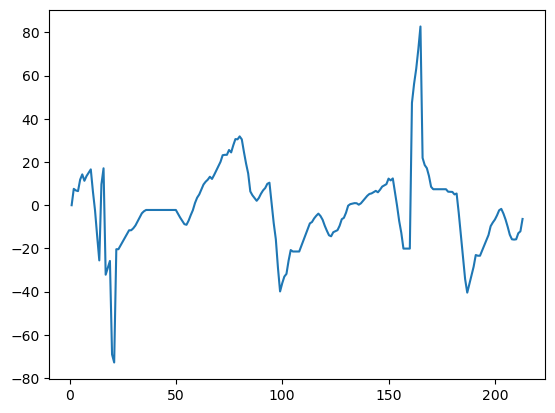

In [175]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [176]:
df_ball_positions['ball_hit']=0
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
0,893.718750,615.549988,910.872803,633.891846,624.720917,624.720917,NaN,0
1,893.718750,615.549988,910.872803,633.891846,624.720917,624.720917,0.000000,0
2,873.646179,637.591431,892.942566,657.352295,647.471863,632.304565,7.583649,0
3,860.819458,649.968811,879.256393,669.305893,659.637352,639.137762,6.833197,0
4,847.992737,662.346191,865.570221,681.259491,671.802841,645.670778,6.533016,0
...,...,...,...,...,...,...,...,...
209,1182.914062,246.512146,1199.999390,267.054108,256.783127,285.475357,-15.915524,0
210,1182.995483,230.201752,1198.755371,248.135376,239.168564,269.694894,-15.780463,0
211,1182.969727,225.363739,1199.323608,244.479126,234.921432,256.722980,-12.971915,0
212,1178.511963,211.311493,1197.584961,230.948502,221.129997,244.650752,-12.072227,0


In [177]:
minimum_change_frames_for_hit = 22
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions.loc[i, 'ball_hit'] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

In [178]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,774.623108,717.185852,794.652649,738.952881,728.069366,734.655292,6.387109,1
16,798.707520,804.013062,815.935730,823.145386,813.579224,719.106903,17.101971,1
58,921.628052,231.659836,942.093750,252.465057,242.062447,240.913310,-2.281276,1
95,624.181549,748.609528,642.916168,767.566803,758.088165,774.805600,1.116382,1
131,702.922485,229.156540,719.109741,247.164963,238.160751,234.950004,-0.215816,1
160,654.491089,205.366333,670.666809,223.189911,214.278122,254.449001,-20.085440,1
182,1293.168457,739.603149,1313.957153,759.950562,749.776855,736.918719,5.421851,1
